In [27]:
# ==========================
# Palmer Penguins Dataset Analysis
# Portfolio Project
# Author: Raz Ben-Yehuda
# Link to Dataset: https://www.kaggle.com/datasets/grandmaster07/penguin-species-analysis-using-seaborn/data
# ==========================

In [62]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# ==========================
# 1. Load Dataset
# ==========================

In [29]:
df = pd.read_csv("penguins (1).csv")
print(df.head())

   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007  


In [ ]:
# ==========================
# 2. Explore Dataset
# ==========================

In [30]:
print("Shape of dataset:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic statistics for numeric columns:")
print(df.describe())
print("\nNumber of unique values per column:")
print(df.nunique())

Shape of dataset: (344, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None

Missing values per column:
Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Basic st

In [ ]:
# ==========================
# 3. Clean Dataset
# ==========================

In [31]:
# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [32]:
# Fill missing numeric values with median
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [34]:
# Fill missing categorical values
df['sex'] = df.groupby('species')['sex'].transform(lambda x: x.fillna(x.mode()[0]))

In [36]:
# Check again for missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [ ]:
# ==========================
# 4. Exploratory Data Analysis (EDA)
# =========================

In [ ]:
#Basic EDA
print(df.groupby('species')[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].mean())

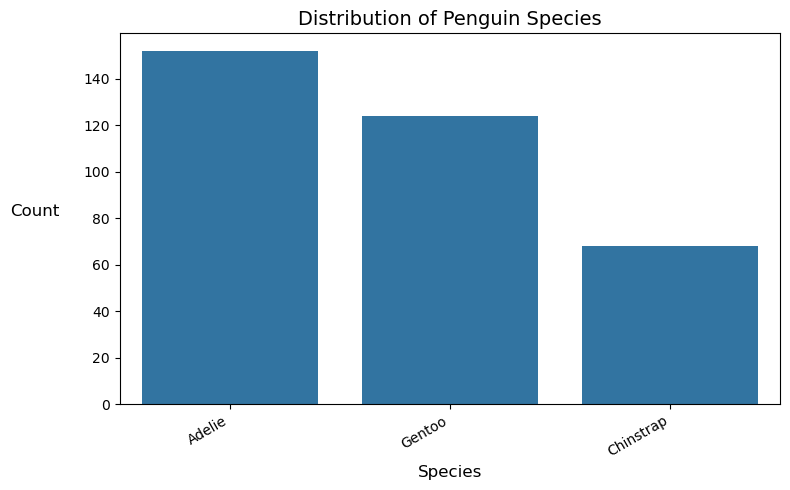

In [60]:
# Countplot of species
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df)
plt.title('Distribution of Penguin Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=35)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

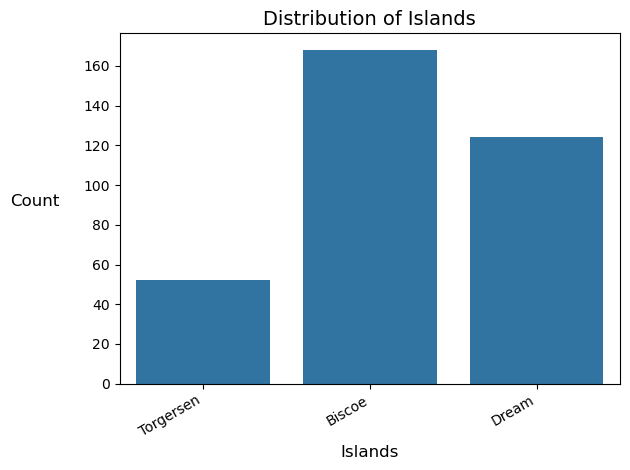

In [75]:
# Countplot of islands
sns.countplot(x='island', data=df)
plt.title('Distribution of Islands', fontsize=14)
plt.xlabel('Islands', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=35)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

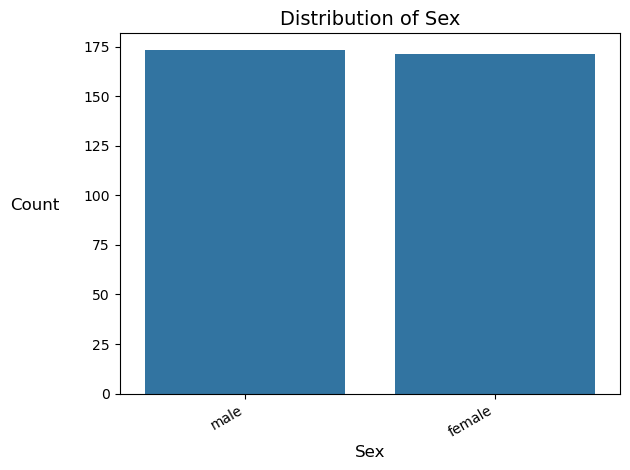

In [76]:
# Countplot of sex
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=35)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

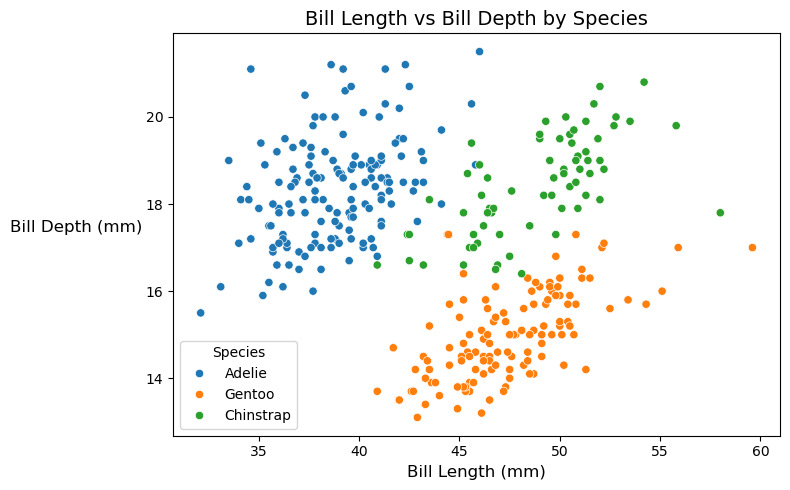

In [54]:
# Scatter plot: Bill Length vs Bill Depth
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('Bill Length vs Bill Depth by Species', fontsize=14)
plt.xlabel('Bill Length (mm)', fontsize=12)
plt.ylabel('Bill Depth (mm)', fontsize=12, rotation=0, labelpad=50)
plt.legend(title='Species')
plt.tight_layout()
plt.show()

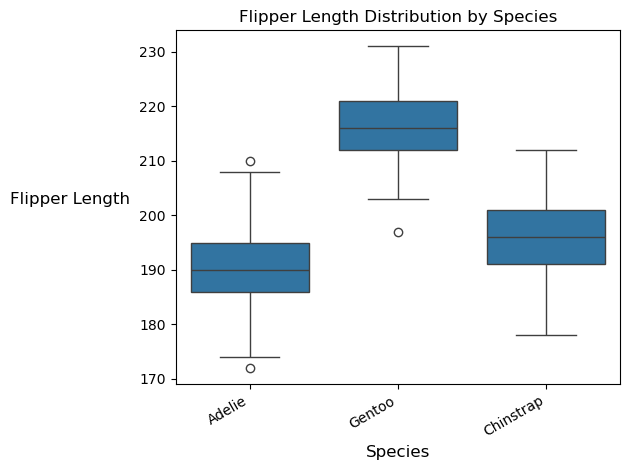

In [53]:
# Boxplot: Flipper Length by Species
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Flipper Length Distribution by Species')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Flipper Length', fontsize=12, rotation=0, labelpad=50)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

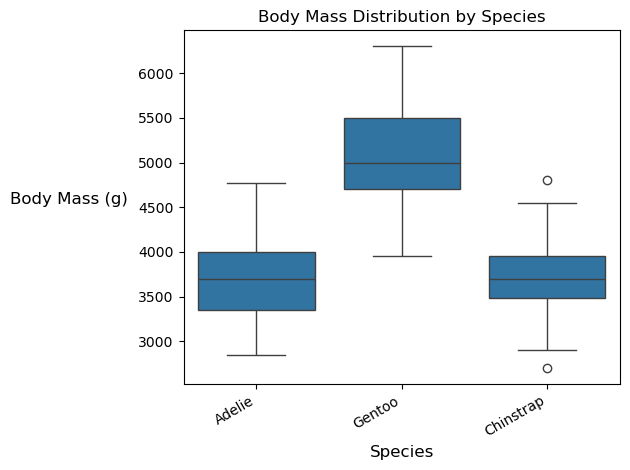

In [52]:
# Body mass vs Species
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Body Mass Distribution by Species')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Body Mass (g)', fontsize=12, rotation=0, labelpad=50)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# ==========================
# 5. Correlation Heatmap
# ==========================

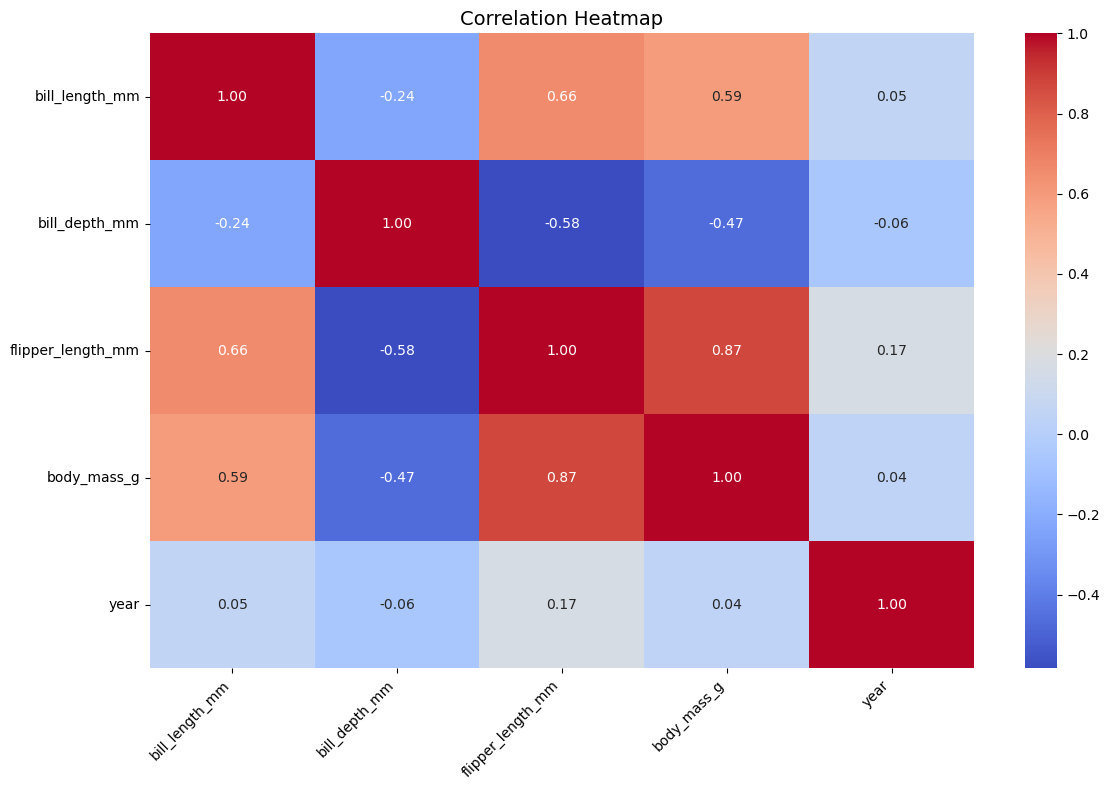

In [42]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ==========================
# 6. Simple Machine Learning Model
# Predict species based on numeric features
# ==========================

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        50
   Chinstrap       0.90      1.00      0.95        18
      Gentoo       0.97      1.00      0.99        36

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



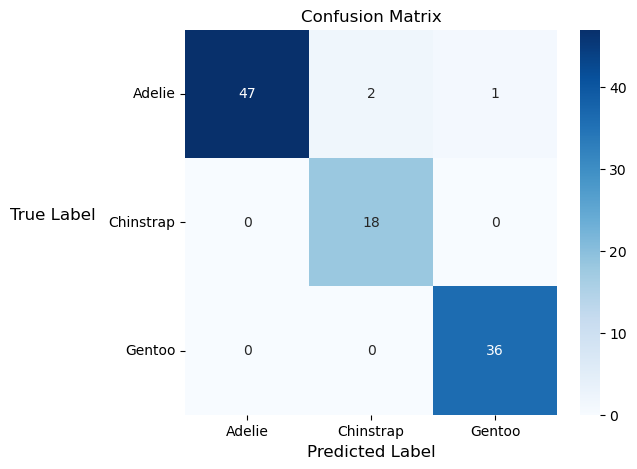

In [70]:
# Drop rows with missing values (should be none after cleaning)
df = df.dropna()

X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
labels = sorted(y_test.unique()) 
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12, rotation=0, labelpad=40)
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()



In [78]:
# ==========================
# 8. Insights & Conclusion
# ==========================
print("Insights:")
print("* ccording to the count plot 'Distribution of Penguin Species', it can be seen that the Adelie is the most sampled penguin species.")
print("* According to the count plot 'Distribution of Islands', it can be seen that most of the observations were taken from Biscoe Island.")
print("* ccording to the count plot 'Distribution of Sex', it can be seen that the difference in the number of observations between males and females is low.")
print("* According to the scatter plot 'Bill Length vs Bill Depth by Species', it can be seen that most observations of Adelie penguins show that the penguins have a Bill Length of between 35 and 40 millimeters and a Bill Depth of between 16 and 20 millimeters.")
print("* According to the scatter plot 'Bill Length vs Bill Depth by Species', it can be seen that most observations of Gentoo penguins show that the penguins have a Bill Length of between 40 and 50 millimeters and a Bill Depth of less than 16 millimeters.")
print("* According to the scatter plot 'Bill Length vs Bill Depth by Species', it can be seen that most observations of Chinstrap penguins show that the penguins have a Bill Length around 50 millimeters and a Bill Depth between 18 and 20 millimeters.")
print("* According to the box plot 'Flipper Length Distribution by Species', it can be seen that Gentoo penguins show that penguins have the highest flipper length among the three species.")
print("* According to the box plot 'Body Mass Distribution by Species', it can be seen that Gentoo penguins show that penguins have the highest Body Mass among the three species.")
print("* According to the Correlation Heatmap, we can see that there is a very strong positive correlation between the length of the flipper (flipper_length_mm) and the body weight (body_mass_g). This means that the longer the penguin's flipper, the higher its weight. It seems that these two variables reflect the overall size of the penguin.")
print("* According to the Correlation Heatmap, it can be seen that there is a moderate to strong positive correlation between bill length (bill_length_mm) and fin length and weight. That is, penguins with long bills tend to also have longer fins and a higher body weight.")
print("* According to the Correlation Heatmap, it can be seen that there is a moderate negative correlation of bill depth (bill_depth_mm) with the other physical measures. This indicates that penguins with deeper bills tend to have shorter flippers and lower weight. This characteristic may differentiate between different penguin species.")
print("* According to the Correlation Heatmap, it can be seen that the variable year has almost no correlation with any of the other physical metrics. From this, it can be concluded that the year in which the penguins were measured does not affect their size or physical characteristics.")
print("* According to the Confusion Matrix, it can be seen that the model is very accurate in classifying most of the samples. For example, out of 50 Adelie specimens, 47 were correctly classified, and only 3 were misclassified (2 as Chinstrap and 1 as Gentoo).")
print("* According to the Confusion Matrix, it can be seen that all Chinstrap specimens (18 in number) were fully correctly classified, with no errors at all. This indicates that the model identifies this species very accurately.")
print("* According to the Confusion Matrix, it can be seen that all Gentoo specimens (36 in number) were also accurately classified, with no misclassifications.")
print("* According to the Confusion Matrix, it can be seen that most of the errors occur only in the Adelie species, with a small proportion of penguins of this species being mistakenly identified as belonging to other species. This may indicate an overlap in physical characteristics between the Adelie species and the other species, or a need to improve the input features for more accurate discrimination.")

print("\nThis analysis demonstrates basic EDA, visualization, and simple ML modeling.")


Insights:
* ccording to the count plot 'Distribution of Penguin Species', it can be seen that the Adelie is the most sampled penguin species.
* According to the count plot 'Distribution of Islands', it can be seen that most of the observations were taken from Biscoe Island.
* ccording to the count plot 'Distribution of Sex', it can be seen that the difference in the number of observations between males and females is low.
* According to the scatter plot 'Bill Length vs Bill Depth by Species', it can be seen that most observations of Adelie penguins show that the penguins have a Bill Length of between 35 and 40 millimeters and a Bill Depth of between 16 and 20 millimeters.
* According to the scatter plot 'Bill Length vs Bill Depth by Species', it can be seen that most observations of Gentoo penguins show that the penguins have a Bill Length of between 40 and 50 millimeters and a Bill Depth of less than 16 millimeters.
* According to the scatter plot 'Bill Length vs Bill Depth by Species